<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">ADMITIDOS UNAL FACULTAD DE CIENCIAS </h2>
<h3 align="center">Análisis de componentes principales (ACP)</h3>


$\;$

---

# Admitidos UNAL

Para el primer semestre de 2013 fueron admitidos 445 estudiantes a las carreras de la Facultad de Ciencias. El examen de admision tuvo 5 componentes temáticos: matemático, científico, social, textual e imagen.

### Usando libreria FACTOCLASS

In [1]:
library ( FactoClass )
data( admi ); names( admi )
Y <-admi [ ,2:6];head(Y)
names (Y)
acp <-dudi.pca(Y, scannf =FALSE ,nf =3)

Loading required package: ade4
Loading required package: ggplot2
Loading required package: ggrepel
Loading required package: xtable
Loading required package: scatterplot3d


[1] "carr" "mate" "cien" "soci" "text" "imag" "exam" "gene" "estr" "orig"
[11] "edad" "niLE" "niMa" "stra" "age"

mate,cien,soci,text,imag
12.03,10.84,12.08,10.62,10.68
11.75,11.16,11.71,10.35,11.60
10.03,10.51,10.70,9.57,8.80
11.48,11.48,11.71,10.91,11.60
11.21,10.84,12.08,11.21,11.26
11.75,10.84,11.36,10.91,10.96


[1] "mate" "cien" "soci" "text" "imag"


Tres valores propios se destacan, pero solo dos son mayores que 1. Seguramente dos son suficientes, pero se debe verificar si el tercer eje permite alguna descripción adicional al primer plano factorial. El primer plano retiene del 57.5% de la inercia y los tres primeros ejes el 74.9 %.

[1] 1.8516980 1.0248954 0.8696715 0.6380381 0.6156969

,Ax1,Ax2,Ax3,Ax4,Ax5
inertia,1.851698,1.024895,0.8696715,0.6380381,0.6156969
cum,1.851698,2.876593,3.7462650,4.3843031,5.0000000
cum(%),37.033961,57.531869,74.9253002,87.6860629,100.0000000


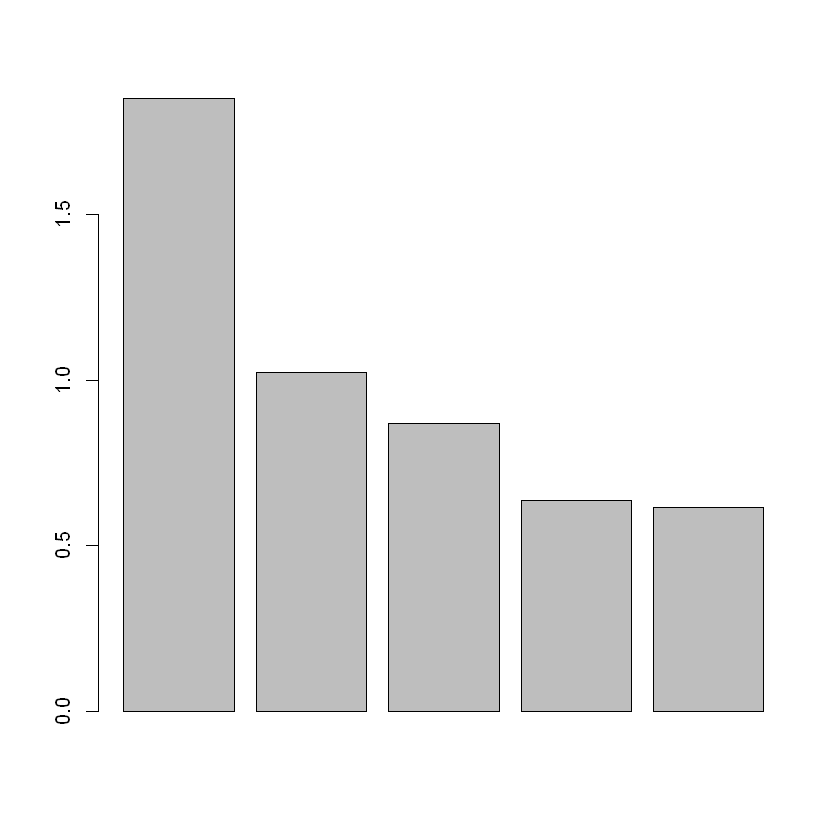

In [2]:
# histograma de valores propios
barplot(acp$eig)

# valores propios y proporciones
acp$eig
valp <-t(inertia.dudi(acp)$tot.inertia)
xtable (valp , digits = rep (3 ,6))

### Círculo de correlaciones

,Axis1,Axis2,Axis3
exam,0.9848009,0.1587145,0.02286728


,Comp1,Comp2,Comp3
mate,0.7062207,0.2592443,0.2039603
cien,0.6120326,0.2416146,0.6016550
soci,0.6448098,-0.4195867,-0.3511748
text,0.6478378,-0.4962385,-0.1051525
imag,0.3780120,0.6906552,-0.5759359


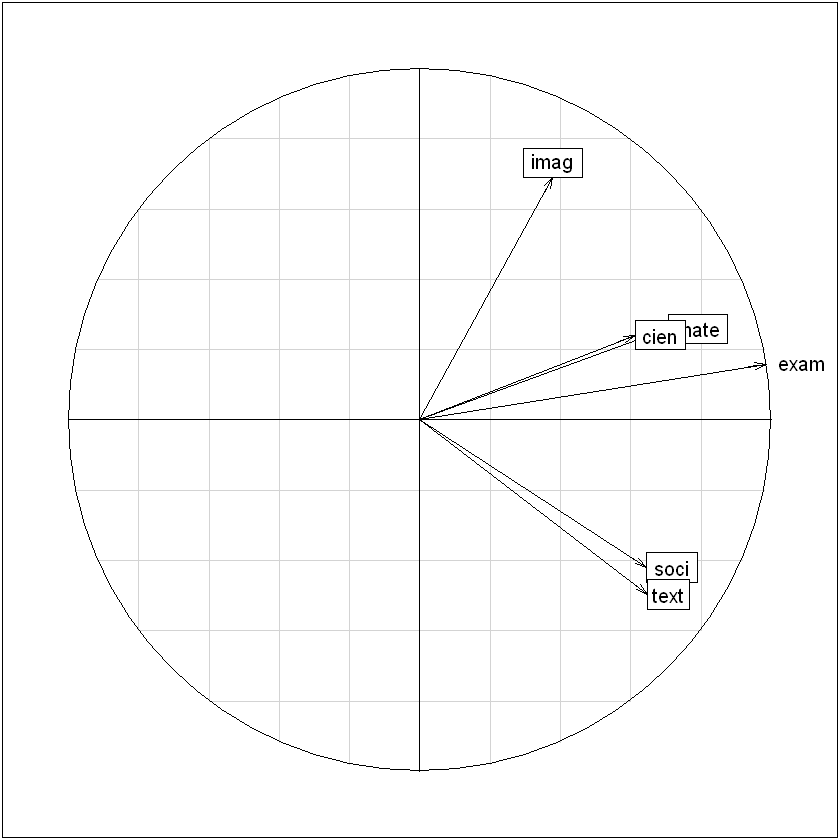

In [4]:
#Correlaciones
s.corcircle(acp$co)

# exam como ilustrativa
Gexam <-cor(admi$exam ,acp$li)                  #Exam es la variable relativa al puntaje
rownames( Gexam ) <-" exam "; Gexam
s.arrow(Gexam ,add.plot =TRUE , boxes = FALSE ) 

#dev. print ( device = xfig , file =" acpExaAdmiCirculo .fig ")
# coordenadas
acp$co                                          #Coordenadas de las variablessobre los ejes factoriales
#xtable(acp$co , digits = rep (3 ,4))
#xtable(Gexam , digits = rep (3 ,4))

se observa un primer eje de tamaño con alta correlación con el puntaje
total y con los mejores puntajes con coordenadas negativas (lado izquierdo del eje). El factor tamaño se presenta cuando todas las correlaciones entre las variables activas son positivas y se observan porque tienen coordenadas con el eje del mismo lado. El primer eje se muestra como otra manera de obtener un puntaje global, ya que su correlación con el resultado del examen es de -0.985. Para tener la coordenada en el mismo sentido basta
cambiarle de signo a todas las coordenadas sobre el primer eje.

El segundo eje contrapone los resultados de imagen, matemático y científico versus social y textual. El tercer eje es inferior a uno, pero su valor es cercano al segundo y destaca la oposición entre los resultados en imagen (positivo) y científico (negativo).


### Primer plano factorial de los admitidos

Los admitidos son anónimos en este ACP, pero las variables cualitativas permiten observar grupos de ellos, según las categorías que asuman. La siguiente figura muestra el primer plano factorial de los individuos con las categorías de las variables cualitativas como ilustrativas.( color verde). La estructura del plano está dada por los resultados del examen, de modo que cualquier ordenamiento de las categorías es indicio de alguna relación con esos resultados.

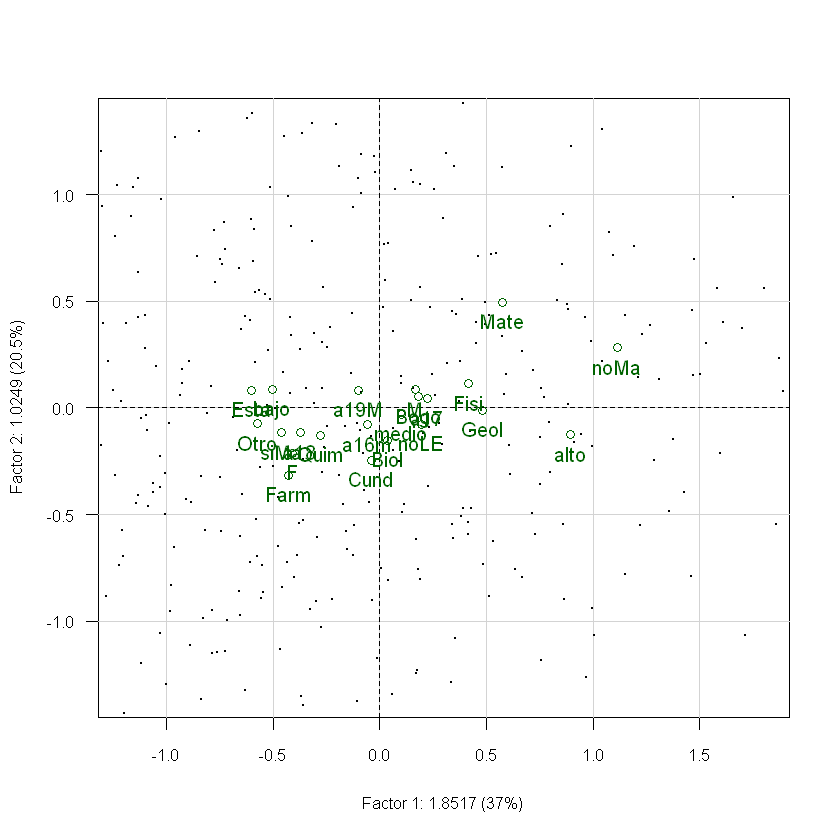

In [5]:
#Primer plano factorial de los admitidos
Ysupcat <-admi[,c (1 ,8:13) ]
sup <- supqual(acp , Ysupcat )
plot(acp,Tcol=FALSE,ucal=100,cex.row =0.2,
       xlim=c( -1 ,1.5),ylim=c( -0.5,0.5))      
points(sup$coor ,col=" darkgreen ")            #variables cualitativas como ilustrativas     
text( sup$coor , labels = rownames ( sup$ coor ),col=" darkgreen ",pos =1)
#dev. print ( device = xfig , file =" acpExaAdmiCatSup .fig ")

### Coordenadas, valores test y cosenos cuadrados de las categorías suplementarias

In [6]:
sup                               #Colocando ayudas a la interpretacion
wcat=cbind(sup$wcat, d2=sup$dis2, sup$coor, sup$tv, sup$cos2)
colnames(wcat)<-c("Peso","Dist^2", "coordenada1","coordenada2","coordenada3", "Valortesteje1","Valortesteje2","Valortesteje3", "Cosenoeje1","Cosenoeje2","Cosenoeje3");wcat

,Axis1,Axis2,Axis3
Biol,0.03620013,-0.15224858,-0.07958989
Esta,-0.60119855,0.08191392,-0.10856777
Farm,-0.42683316,-0.31535392,0.06828870
Fisi,0.41635899,0.11391906,0.10797499
Geol,0.48274348,-0.01021110,-0.07121682
Mate,0.57276488,0.49638971,-0.01366144
Quim,-0.28038279,-0.12673556,0.03602262
F,-0.41014495,-0.21121215,0.11664668
M,0.16561058,0.08528440,-0.04710024
bajo,-0.50623499,0.08763535,0.03465474


,Peso,Dist^2,coordenada1,coordenada2,coordenada3,Valortesteje1,Valortesteje2,Valortesteje3,Cosenoeje1,Cosenoeje2,Cosenoeje3
Biol,0.14157303,0.11702154,0.03620013,-0.15224858,-0.07958989,0.2276435,-1.28689627,-0.7303152,0.01119836,0.1980800151,0.0541314841
Esta,0.14831461,0.40292912,-0.60119855,0.08191392,-0.10856777,-3.8848718,0.71147853,-1.0236869,0.89703047,0.0166527827,0.0292531867
Farm,0.16404494,0.34639035,-0.42683316,-0.31535392,0.06828870,-2.9278884,-2.90763511,0.6835222,0.52595734,0.2870983523,0.0134626902
Fisi,0.18426966,0.21358246,0.41635899,0.11391906,0.10797499,3.0642766,1.12694242,1.1595531,0.81165282,0.0607613235,0.0545859341
Geol,0.10112360,0.24384159,0.48274348,-0.01021110,-0.07121682,2.5072583,-0.07128539,-0.5397252,0.95570762,0.0004275997,0.0207997171
Mate,0.11910112,0.75121096,0.57276488,0.49638971,-0.01366144,3.2612019,3.79900069,-0.1135024,0.43670769,0.3280073825,0.0002484454
Quim,0.14157303,0.10553932,-0.28038279,-0.12673556,0.03602262,-1.7631788,-1.07124495,0.3305428,0.74488361,0.1521887963,0.0122952196
F,0.28764045,0.22942639,-0.41014495,-0.21121215,0.11664668,-4.0357023,-2.79348255,1.6747947,0.73321504,0.1944439511,0.0593063753
M,0.71235955,0.03740630,0.16561058,0.08528440,-0.04710024,4.0357023,2.79348255,-1.6747947,0.73321504,0.1944439511,0.0593063753
bajo,0.40224719,0.26667553,-0.50623499,0.08763535,0.03465474,-6.4304929,1.49629332,0.6423359,0.96099506,0.0287988735,0.0045034170


Las carreras con mejores resultados son Matemáticas, Física y Geología, en oposición a Estadística, Farmacia y Química. Los admitidos a Matemíticas, en promedio, tienen mejores resultados en las pruebas de imagen, matemático y científico. Son pocos los admitidos los que tienen que nivelar lecto-escritura (siLE), y por eso se ubican más lejos, al lado
derecho arriba, donde se sitúan los de peores resultados en el examen de admisión. En la nivelación de matemáticas la situación es inversa, y los que no tienen que hacerlo están al lado izquierdo, arriba, de mejores resultados en el examen.

En el tercer eje (ver valores test en la tabla 3.2) se observa que en promedio los que tienen edades de 16 años o menos, por un lado, y los que vienen de otra región, por otro, tienen resultados inferiores en la componente de imagen.

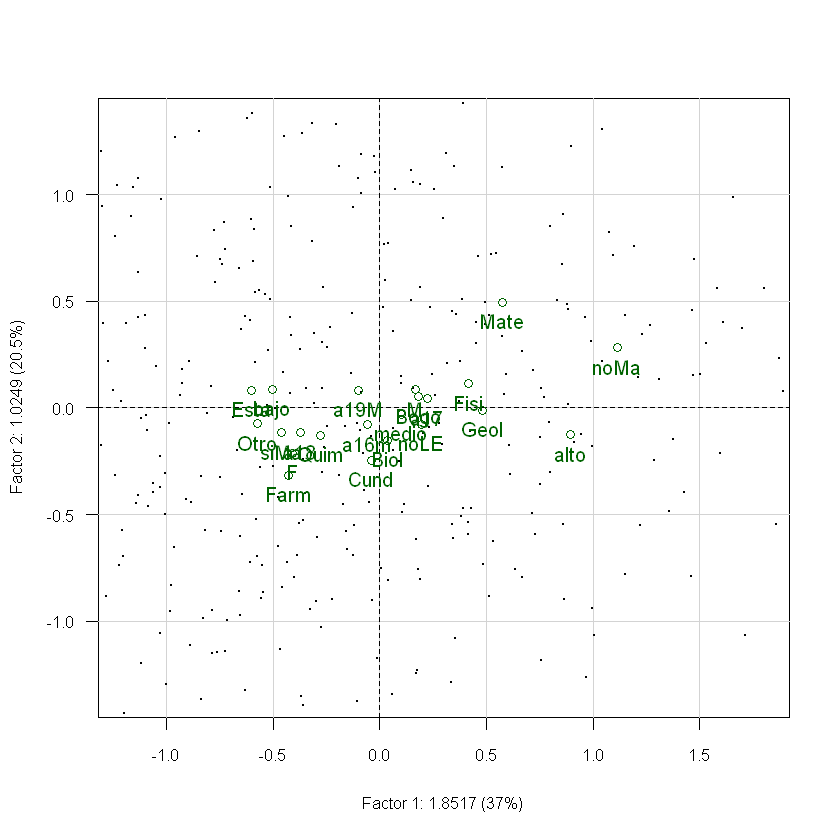

In [7]:
#Primer plano factorial de los admitidos
Ysupcat <-admi[,c (1 ,8:13) ]
sup <- supqual(acp , Ysupcat )
plot(acp,Tcol=FALSE,ucal=100,cex.row =0.2,
       xlim=c( -1 ,1.5),ylim=c( -0.5,0.5))      
points(sup$coor ,col=" darkgreen ")            #variables cualitativas como ilustrativas     
text( sup$coor , labels = rownames ( sup$ coor ),col=" darkgreen ",pos =1)
#dev. print ( device = xfig , file =" acpExaAdmiCatSup .fig ")

In [8]:
#dev. print ( device = xfig , file =" acpExaAdmiCatSup .fig ")